In [17]:
#Gerekli kütüphaneler eklenmiştir.
from sklearn.metrics import classification_report,confusion_matrix
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error,explained_variance_score
from keras.layers.core import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
from sklearn.preprocessing import LabelEncoder
from keras.layers.core import Activation
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import seaborn as sns


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [200]:
#Veri setini okuma işlemi gerçekeştiriliyor.
df=pd.read_csv('/content/gdrive/MyDrive/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Yeni Bölüm

Epoch 1/200
119/119 [==============================] - 1s 3ms/step - loss: 357770546790.4000 - val_loss: 98827870208.0000
Epoch 2/200
119/119 [==============================] - 0s 2ms/step - loss: 88275184435.2000 - val_loss: 76296380416.0000
Epoch 3/200
119/119 [==============================] - 0s 2ms/step - loss: 73215872204.8000 - val_loss: 55964626944.0000
Epoch 4/200
119/119 [==============================] - 0s 2ms/step - loss: 56086672725.3333 - val_loss: 48841084928.0000
Epoch 5/200
119/119 [==============================] - 0s 2ms/step - loss: 49237342276.2667 - val_loss: 44632457216.0000
Epoch 6/200
119/119 [==============================] - 0s 2ms/step - loss: 44893171370.6667 - val_loss: 41508737024.0000
Epoch 7/200
119/119 [==============================] - 0s 2ms/step - loss: 39980626602.6667 - val_loss: 38635925504.0000
Epoch 8/200
119/119 [==============================] - 0s 2ms/step - loss: 41323792725.3333 - val_loss: 36453036032.0000
Epoch 9/200
119/119 [==========

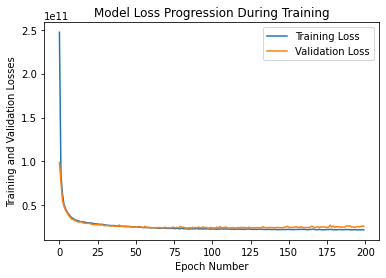

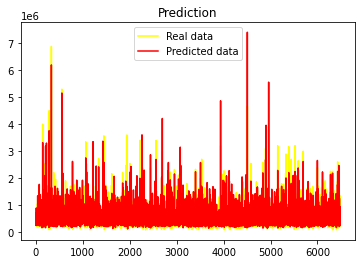

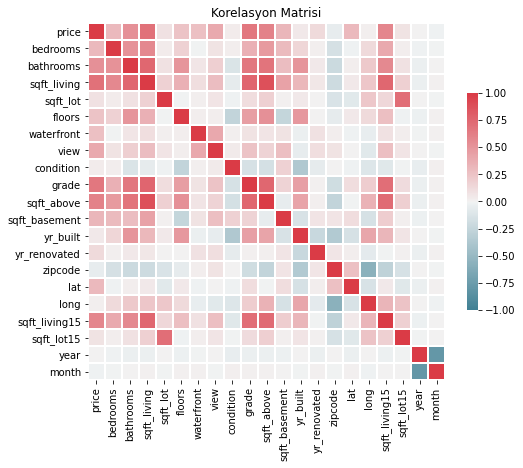

In [201]:
#to_datetime ile date sütunu parçalara ayrılmıştır.
df['date'] = pd.to_datetime(df['date'])
#year ve month olarak sütun oluşturuldu.
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
#id ve date sütunları silinmiştir.
df= df.drop(['id', 'date'],axis=1)


X = df.drop('price',axis=1).values
y = df['price'].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Verilerin 0.3'lük kısmı test için ayrılmıştır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Modelimiz bu bölümde tanımlanıyor.
model = Sequential()
#Toplam 4 katman vardır. 2 tane ara katman bulunmaktadır.
model.add(Dense(19,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

optimizer = keras.optimizers.Adam(lr=0.025)
model.compile(optimizer,loss='mse')
history=model.fit(X_train,y_train, validation_data=(X_test,y_test),batch_size=128,epochs=200)

loss_df = pd.DataFrame(model.history.history)
#loss_df.plot()
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
preds = model.predict(X_test)

print(preds)
explained_variance_score(y_test,preds)


# varyans puanı
print('Score: ',explained_variance_score(y_test,preds))

#Grafik fonksiyonlar: 
def plot_graph(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss Progression During Training')
  plt.ylabel('Training and Validation Losses')
  plt.xlabel('Epoch Number')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()
  plt.close()
plot_graph(history)


def plot_Count(history):
    plt.plot(y_test, color = 'yellow', label = 'Real data')
    plt.plot(preds, color = 'red', label = 'Predicted data')
    plt.title('Prediction')
    plt.legend()
    plt.show()
    plt.close()
plot_Count(history)


#KORELASYON MATRİSİ
def plot_corr(df):
    f, ax = plt.subplots(figsize=(8, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df.corr(), cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Korelasyon Matrisi')
plot_corr(df)






# Yeni Bölüm